In [1]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import xml.etree.ElementTree as ET

import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import random
from tqdm.auto import tqdm
from tqdm import tqdm
import shutil as sh
random.seed(10)

In [2]:
print("loaded module")

loaded module


In [3]:
# img_name = []
# classes = []
# x_min = []
# y_min = []
# x_max = []
# y_max = []
# for file in tqdm(os.listdir('/kaggle/input/dataset-project/ZJU-Leaper/Annotations/xmls/')):
#   tree = ET.parse('/kaggle/input/dataset-project/ZJU-Leaper/Annotations/xmls/' + file)
#   root = tree.getroot()
#   roots = [*root]
#   if len(roots)>6:
#     #defective_mode.append('yes')
#     #print(root[6].text)
#     for box in roots[7:]:
#       img_name.append(roots[0].text)
#       #classes.append(1)
#       classes.append(0)
#       x_min.append(float(box[0].text))
#       y_min.append(float(box[1].text))
#       x_max.append(float(box[2].text))
#       y_max.append(float(box[3].text))
#   else:
#     img_name.append(roots[0].text)
#     classes.append(1)                              # Check before run 'change to 0'
#     x_min.append(float(0))
#     y_min.append(float(0))
#     x_max.append(float(0))
#     y_max.append(float(0))
# df = pd.DataFrame({'img_id':img_name,
#                    'x_min':x_min,
#                    'y_min':y_min,
#                    'x_max':x_max,
#                    'y_max':y_max,
#                    'classes':classes
#                    })

In [4]:

df = pd.read_csv("/kaggle/input/df-of-data/image_data.csv")
df.to_csv("image_data.csv")
print("saving the output")

saving the output


In [5]:
# img_name = []
# defective_mode = []
# non_defective = []
# maskimg_name = []
# boxes = []
# for file in tqdm(os.listdir('/kaggle/input/dataset-project/ZJU-Leaper/Annotations/xmls/')):
#   tree = ET.parse('/kaggle/input/dataset-project/ZJU-Leaper/Annotations/xmls/' + file)
#   root = tree.getroot()
#   img_name.append(root[0].text)
#   roots = [*root]
#   if len(roots)>6:
#     defective_mode.append('yes')
#     maskimg_name.append(root[6].text)
#     bs = []
#     for box in roots[7:]:
#       bs.append([box[i].text for i in range(4)])
#     boxes.append(bs)
#   else:
#     non_defective.append(root[0].text)
#     defective_mode.append('no')
#     boxes.append([])
# img_df = pd.DataFrame({'img_name':img_name,
#               'defective_mode':defective_mode,
#               'boxes':boxes
#               })

In [6]:

img_df = pd.read_csv("/kaggle/input/df-of-data/image_df.csv")
img_df.to_csv("image_df.csv")
print("saving output2")

saving output2


In [7]:
im_h, im_w, num_chanels = 512, 512, 3
df["x_center"] = (df["x_max"] + df["x_min"])/2
df["y_center"] = (df["y_max"] + df["y_min"])/2
df["w"] = df["x_max"] - df["x_min"]
df["h"] = df["y_max"] - df["y_min"]
#Normalizing the values with image height and width
df["x_center"] = df["x_center"]/im_w
df["w"] = df["w"]/im_w
df["y_center"] = df["y_center"]/im_h
df["h"] = df["h"]/im_h
df

Unnamed: 0      img_id  x_min  y_min  x_max  y_max  classes  x_center  \
0                0  037927.jpg    4.0  390.0  109.0  512.0        1  0.110352   
1                1  052817.jpg    0.0    0.0    0.0    0.0        1  0.000000   
2                2  075438.jpg    0.0    0.0    0.0    0.0        1  0.000000   
3                3  020459.jpg  204.0  110.0  512.0  331.0        1  0.699219   
4                4  044340.jpg  491.0  368.0  512.0  406.0        1  0.979492   
...            ...         ...    ...    ...    ...    ...      ...       ...   
106797      106797  064106.jpg    0.0    0.0    0.0    0.0        1  0.000000   
106798      106798  001504.jpg    0.0    0.0    0.0    0.0        1  0.000000   
106799      106799  053364.jpg    0.0    0.0    0.0    0.0        1  0.000000   
106800      106800  061468.jpg    0.0    0.0    0.0    0.0        1  0.000000   
106801      106801  071181.jpg    0.0    0.0    0.0    0.0        1  0.000000   

        y_center         w         h  
0       0.880859  0.205078  0.238281  
1       0.000000  0.000000  0.000000  
2       0.000000  0.000000  0.000000  
3       0.430664  0.601562  0.431641  
4       0.755859  0.041016  0.074219  
...          ...       ...       ...  
106797  0.000000  0.000000  0.000000  
106798  0.000000  0.000000  0.000000  
106799  0.000000  0.000000  0.000000  
106800  0.000000  0.000000  0.000000  
106801  0.000000  0.000000  0.000000  

[106802 rows x 11 columns]

In [8]:
non_defective = img_df[img_df['defective_mode'] == 'no']
defective = img_df[img_df['defective_mode'] == 'yes']
print(len(non_defective), len(defective))

71127 23706


In [9]:
# random.seed(10)
non_defective_idx = random.sample(list(non_defective['img_name']), 5000)
defective_idx = random.sample(list(defective['img_name']), 5000)
print(len(non_defective_idx), len(defective_idx))

5000 5000


In [10]:
# random.seed(10)
test_non_def = random.sample(non_defective_idx, int(len(non_defective_idx)*0.1))
test_def = random.sample(defective_idx, int(len(defective_idx)*0.1))
print(len(test_non_def), len(test_def))
test_idx = test_non_def + test_def

500 500


In [11]:
train_def_idx = [x for x in defective_idx if x not in test_def]
train_non_def_idx = [x for x in non_defective_idx if x not in test_non_def]
train_idx = train_def_idx + train_non_def_idx
len(train_idx)


9000

In [12]:
random.seed(10)
val_idx = random.sample(train_idx, int(len(train_idx)*0.1))
train_idx = [x for x in train_idx if x not in val_idx]
print(len(val_idx), len(train_idx))

900 8100


In [13]:
res_df = df[df['img_id'].isin(defective_idx+non_defective_idx)]
len(res_df)

12525

In [14]:
for name, mini in tqdm(res_df.groupby('img_id')):
  if name in val_idx:
    path2save = 'val/'
  elif name in train_idx:
    path2save = 'train/'
  else:
    path2save = 'test/'
  if not os.path.exists('/kaggle/working/yolo/data/labels/'+path2save):
    os.makedirs('/kaggle/working/yolo/data/labels/'+path2save)
  with open('/kaggle/working/yolo/data/labels/'+path2save+name[:-4]+".txt", 'w+') as f:
    row = mini[['classes','x_center','y_center','w','h']].astype(float).values
    row = row.astype(str)
    for j in range(len(row)):
      text = ' '.join(row[j])
      f.write(text)
      f.write("\n")
  if not os.path.exists('/kaggle/working/yolo/data/images/{}'.format(path2save)):
    os.makedirs('/kaggle/working/yolo/data/images/{}'.format(path2save))
  sh.copy("/kaggle/input/dataset-project/ZJU-Leaper/Images/{}".format(name),'/kaggle/working/yolo/data/images/{}/{}'.format(path2save,name))

100%|██████████| 10000/10000 [01:27<00:00, 114.90it/s]


In [15]:
os.chdir('/kaggle/working/yolo')

In [16]:
len(os.listdir("/kaggle/working/yolo/data/images/train"))

8100

In [17]:
%%writefile dataset.yaml
path: /kaggle/working/yolo/data
train: /kaggle/working/yolo/data/images/train
val: /kaggle/working/yolo/data/images/val
test: /kaggle/working/yolo/data/images/test

names:
    0: non_defective 
    1: defective

Writing dataset.yaml


In [18]:
print('starting the yolov5')

starting the yolov5


In [19]:
!git clone https://github.com/ultralytics/yolov5
!cd yolov5
!pip install -r ./yolov5/requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 15338, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 15338 (delta 0), reused 2 (delta 0), pack-reused 15335
Receiving objects: 100% (15338/15338), 14.15 MiB | 25.20 MiB/s, done.
Resolving deltas: 100% (10524/10524), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.0 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.8.0
    Uninstalling setuptools-59.8.0:
      Successfully uninstalled setuptools-59.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-cudf 21.12.2 requires cupy-cuda115, which is not installed.
cudf 21.12.2 requires cupy-cuda115, which is not installed.
tensorflow 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorf

In [20]:
IMG_SIZE = 512
CONF_TRESHOLD = 0.3
IOU_THRESHOLD = 0.5
MODEL = 'yolov5x.pt'

In [21]:
import time

start = time.perf_counter()

!python yolov5/train.py --batch 32 --epochs 100 --data dataset.yaml --weights {MODEL} --name my_model_5x

end = time.perf_counter()

total_time = end - start

print(f'Training time for {MODEL} model is: {total_time:0.2f} seconds')

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5x.pt, cfg=, data=dataset.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=my_model_5x, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https:

In [22]:
!ls yolov5/runs/train/my_model_5x/

F1_curve.png					   results.png
PR_curve.png					   train_batch0.jpg
P_curve.png					   train_batch1.jpg
R_curve.png					   train_batch2.jpg
confusion_matrix.png				   val_batch0_labels.jpg
events.out.tfevents.1679773885.29556f98bae7.144.0  val_batch0_pred.jpg
hyp.yaml					   val_batch1_labels.jpg
labels.jpg					   val_batch1_pred.jpg
labels_correlogram.jpg				   val_batch2_labels.jpg
opt.yaml					   val_batch2_pred.jpg
results.csv					   weights


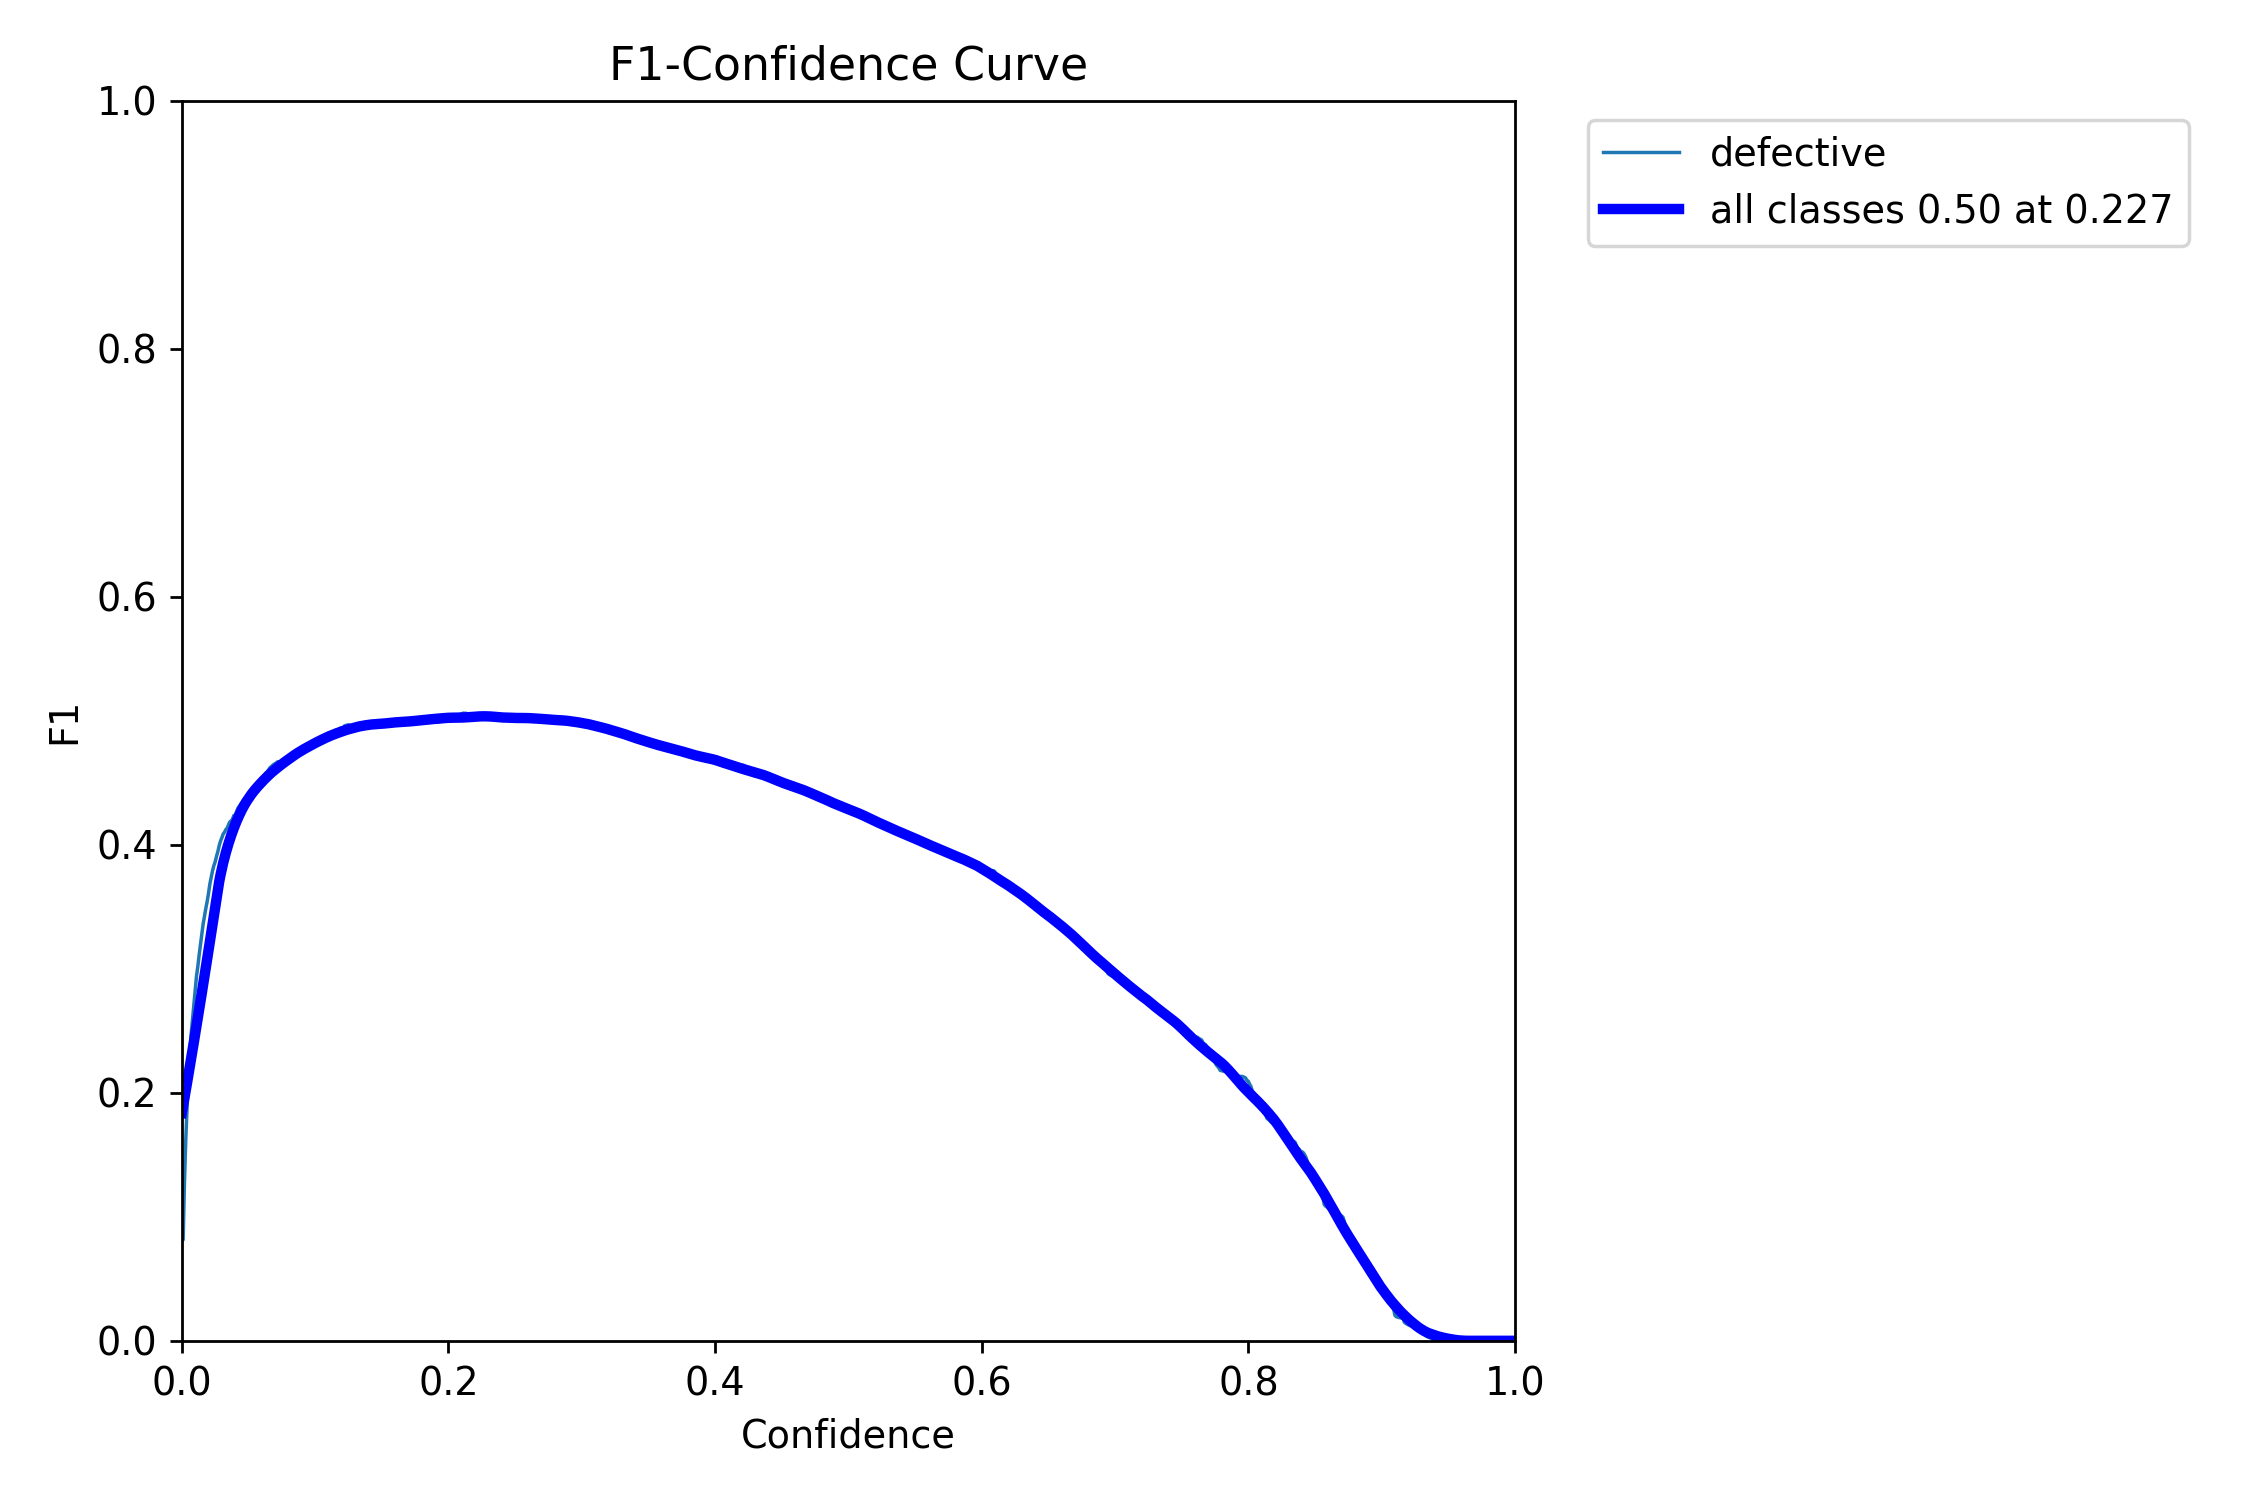

In [23]:
Image.open("yolov5/runs/train/my_model_5x/F1_curve.png")

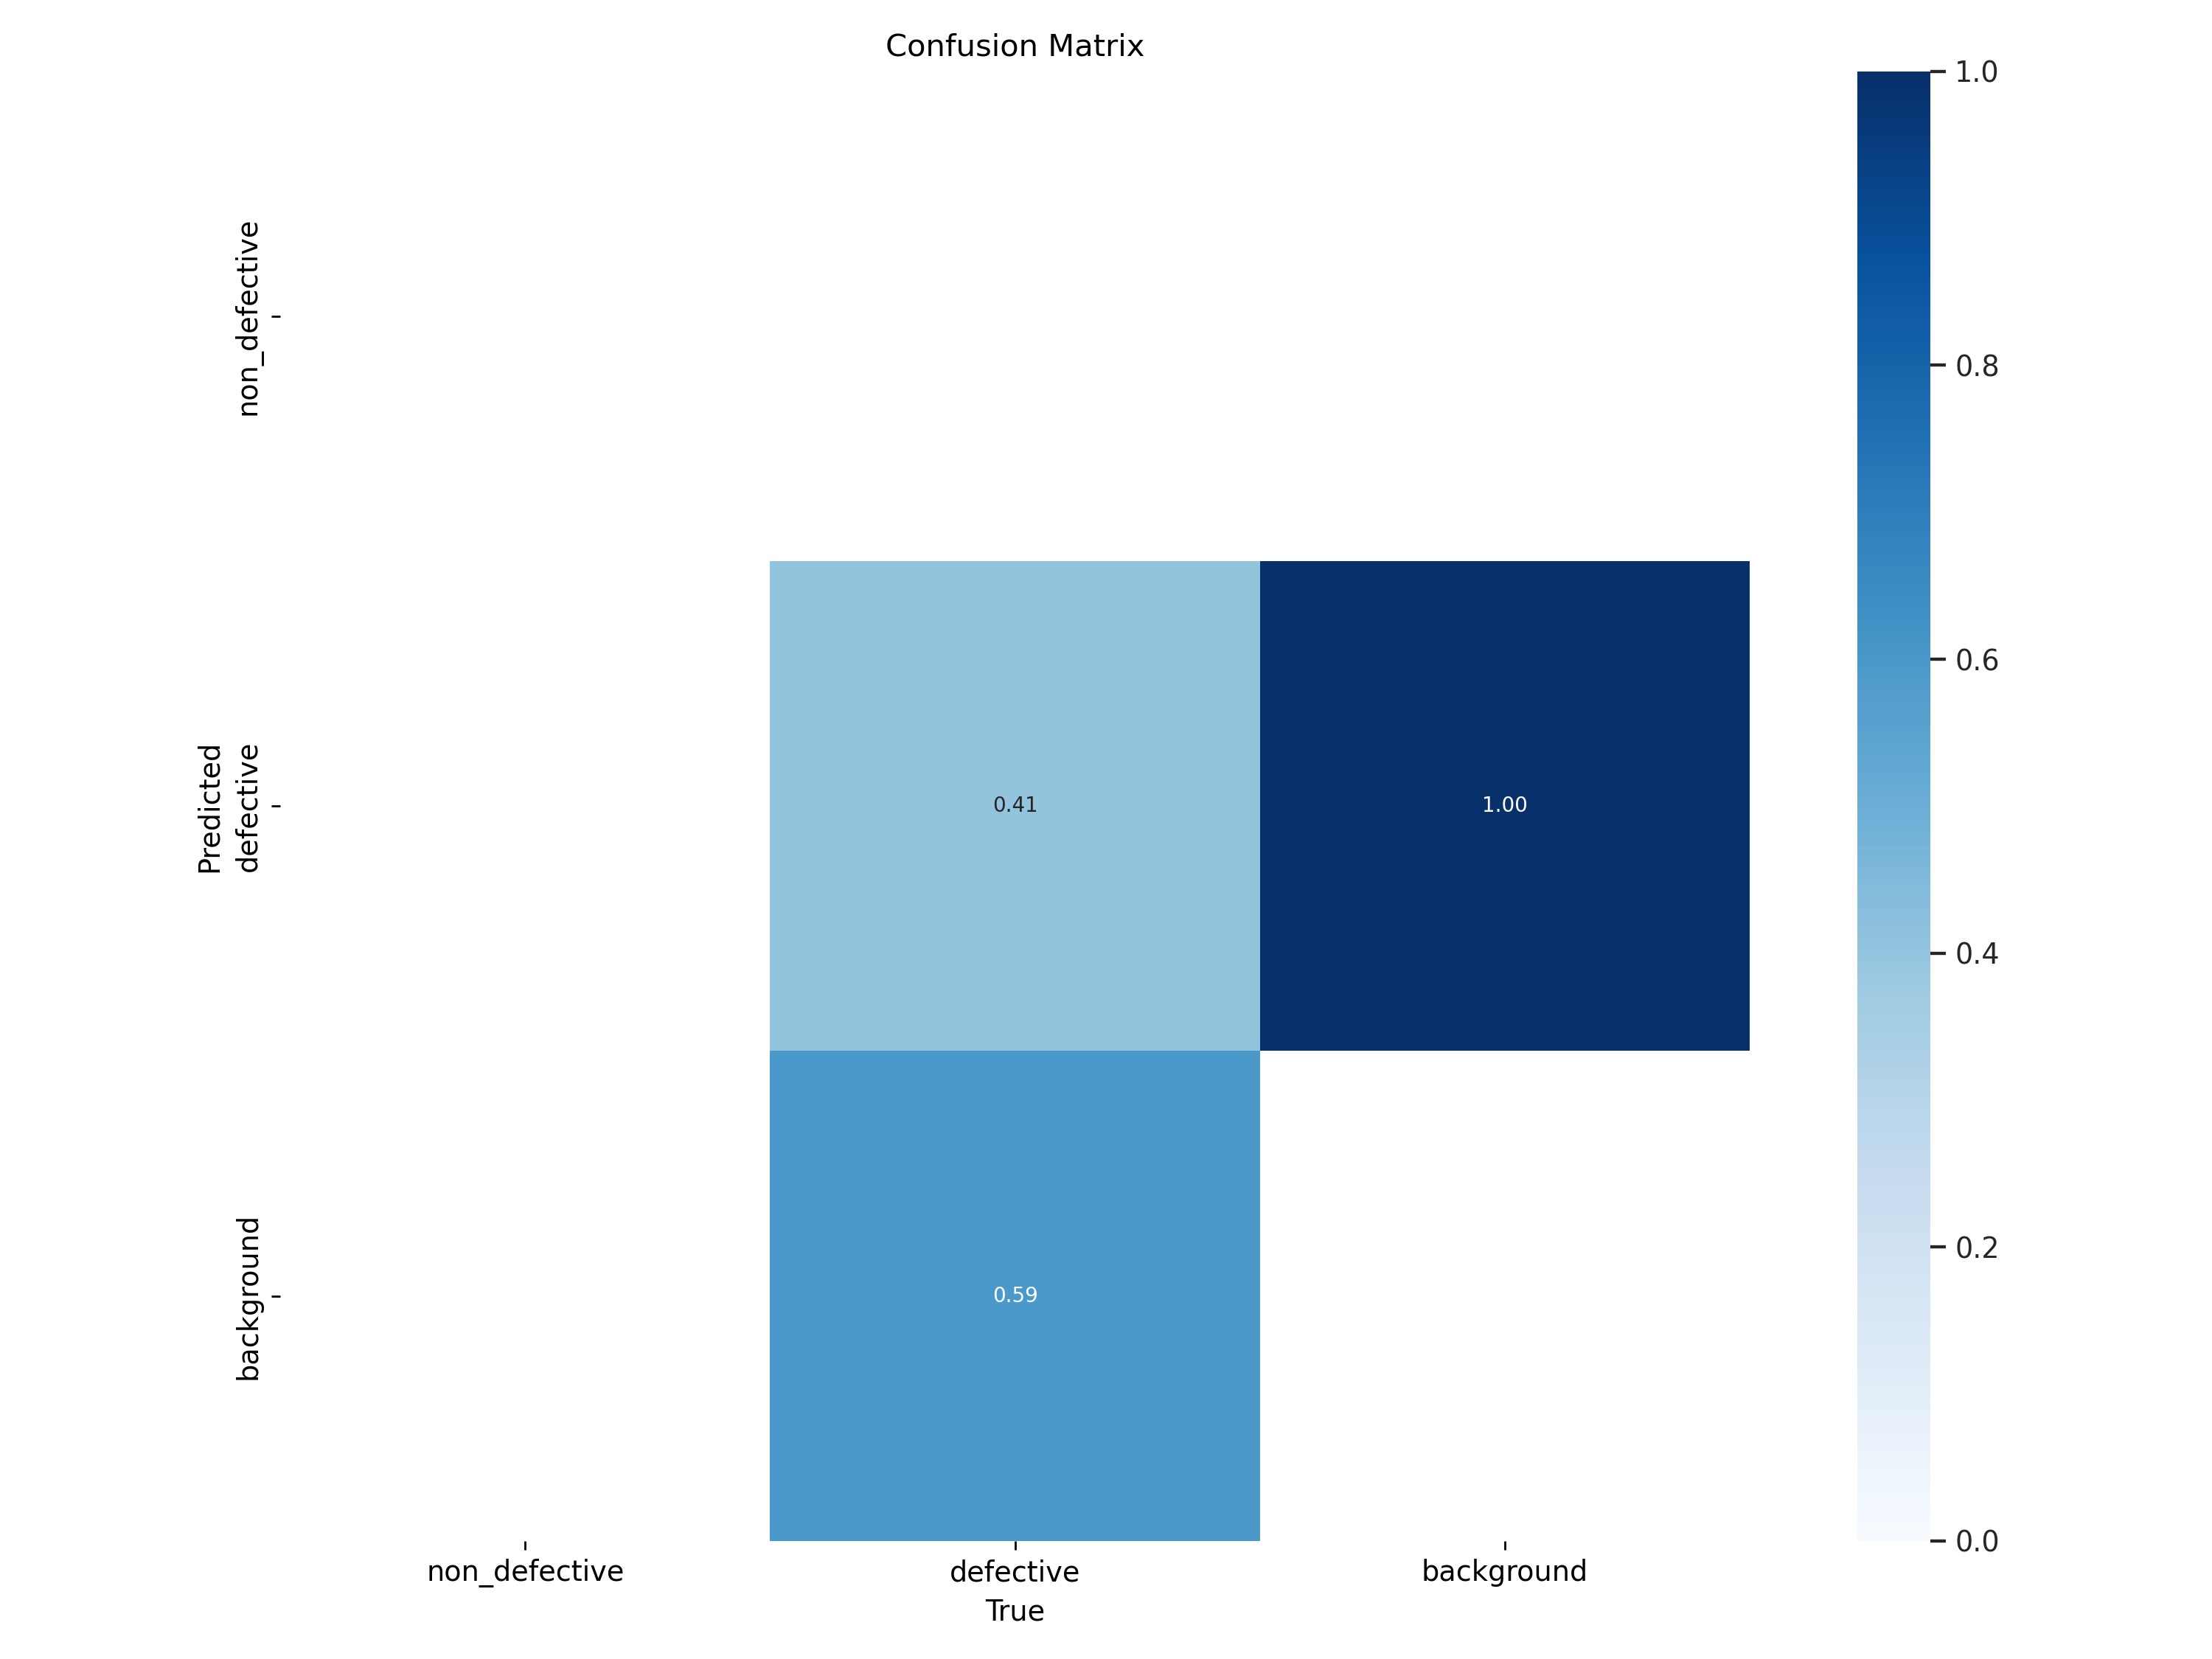

In [24]:
Image.open("yolov5/runs/train/my_model_5x/confusion_matrix.png")

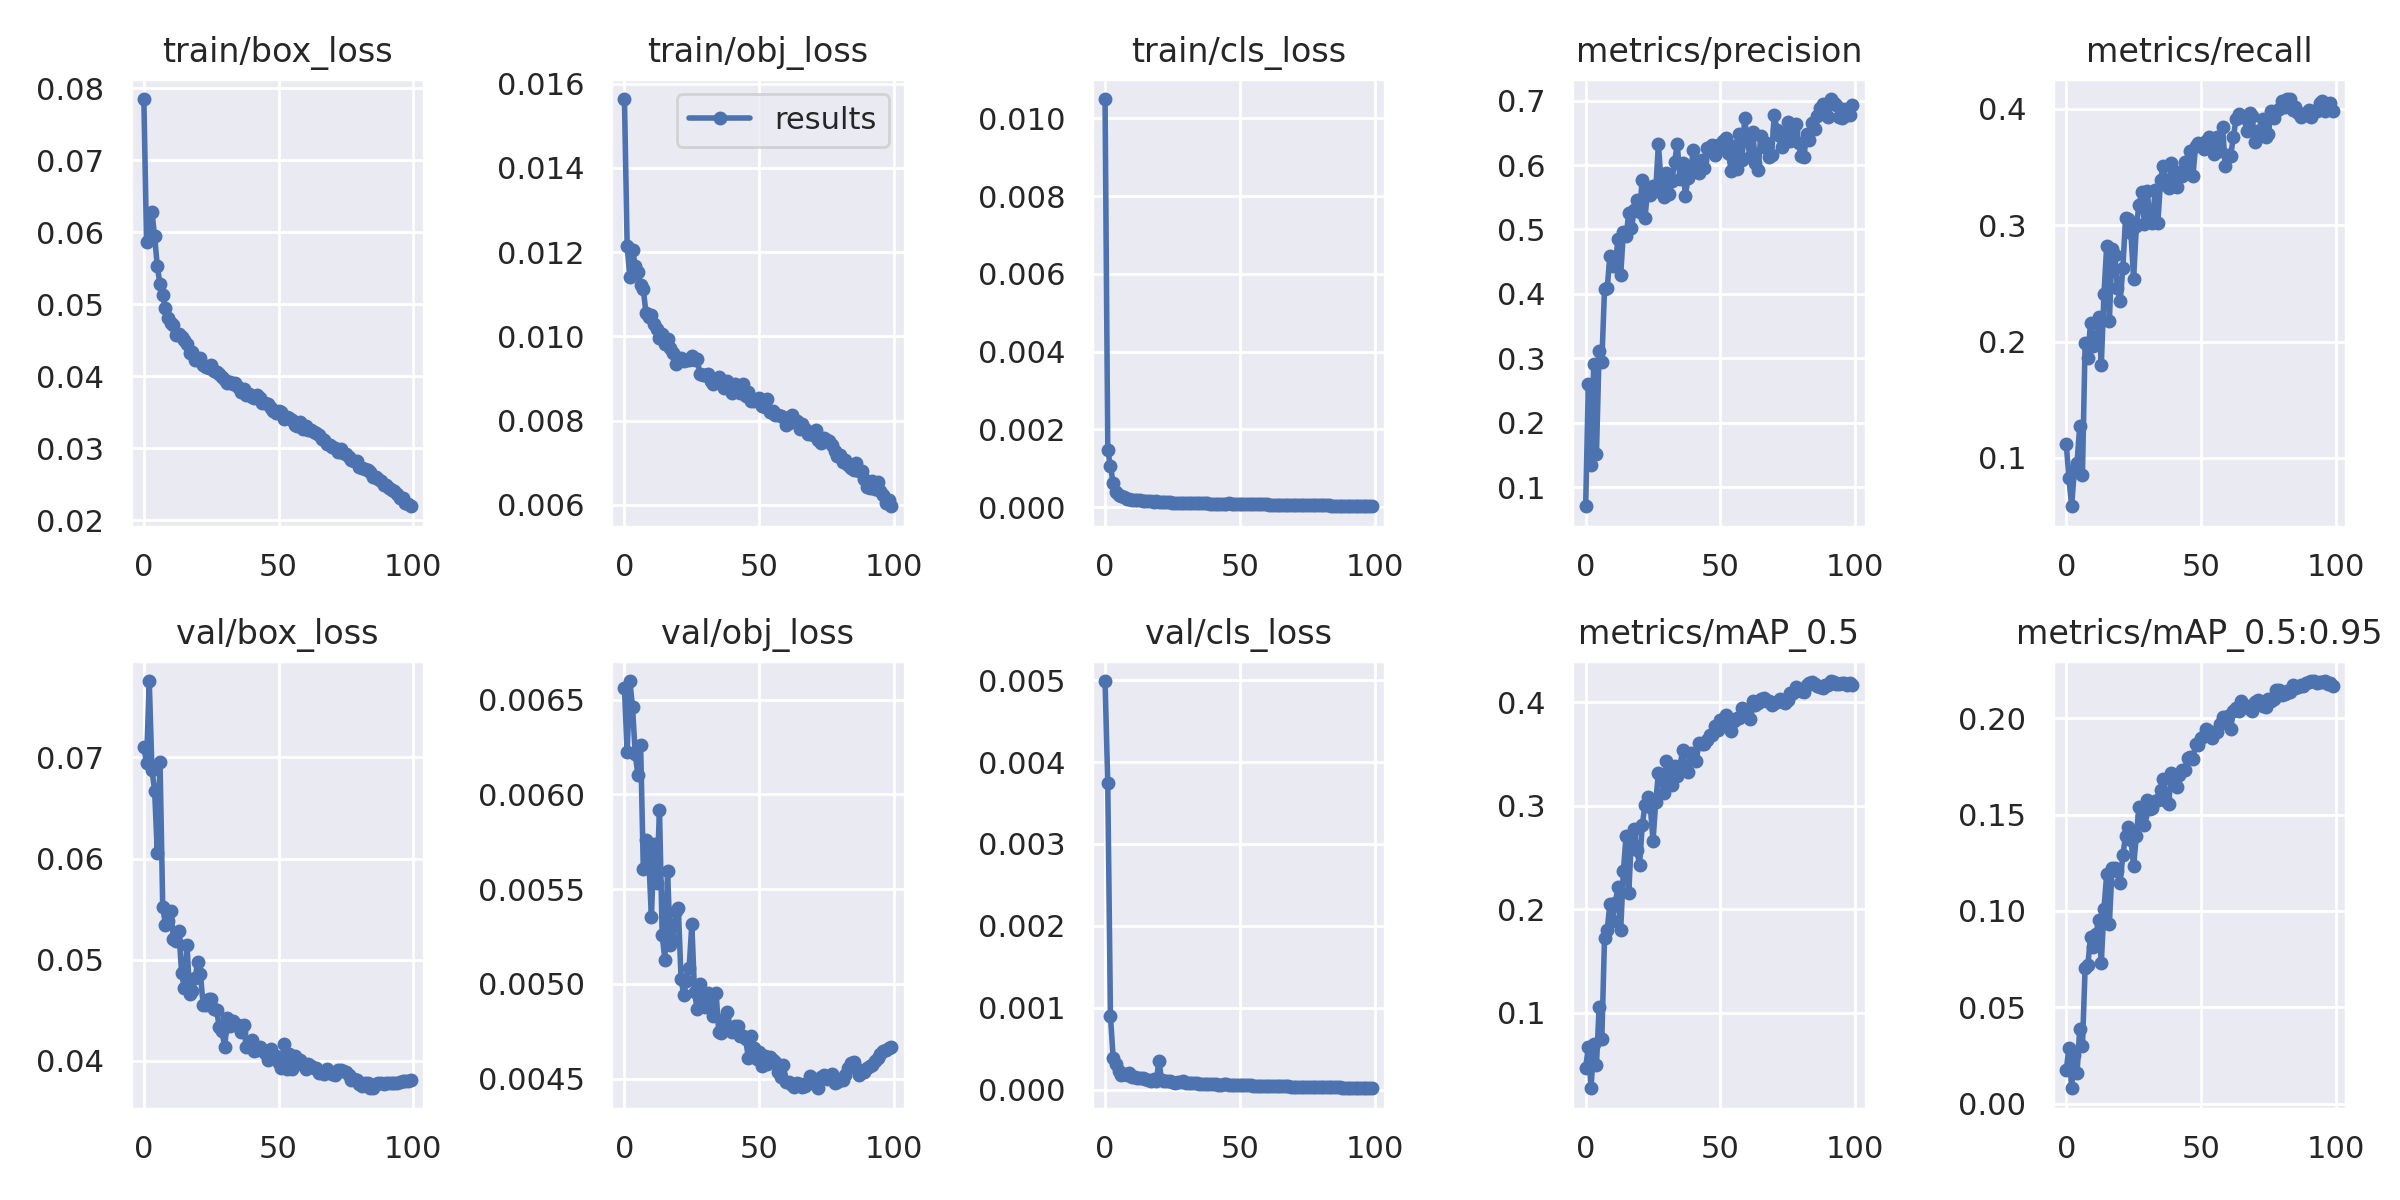

In [25]:
Image.open("yolov5/runs/train/my_model_5x/results.png")

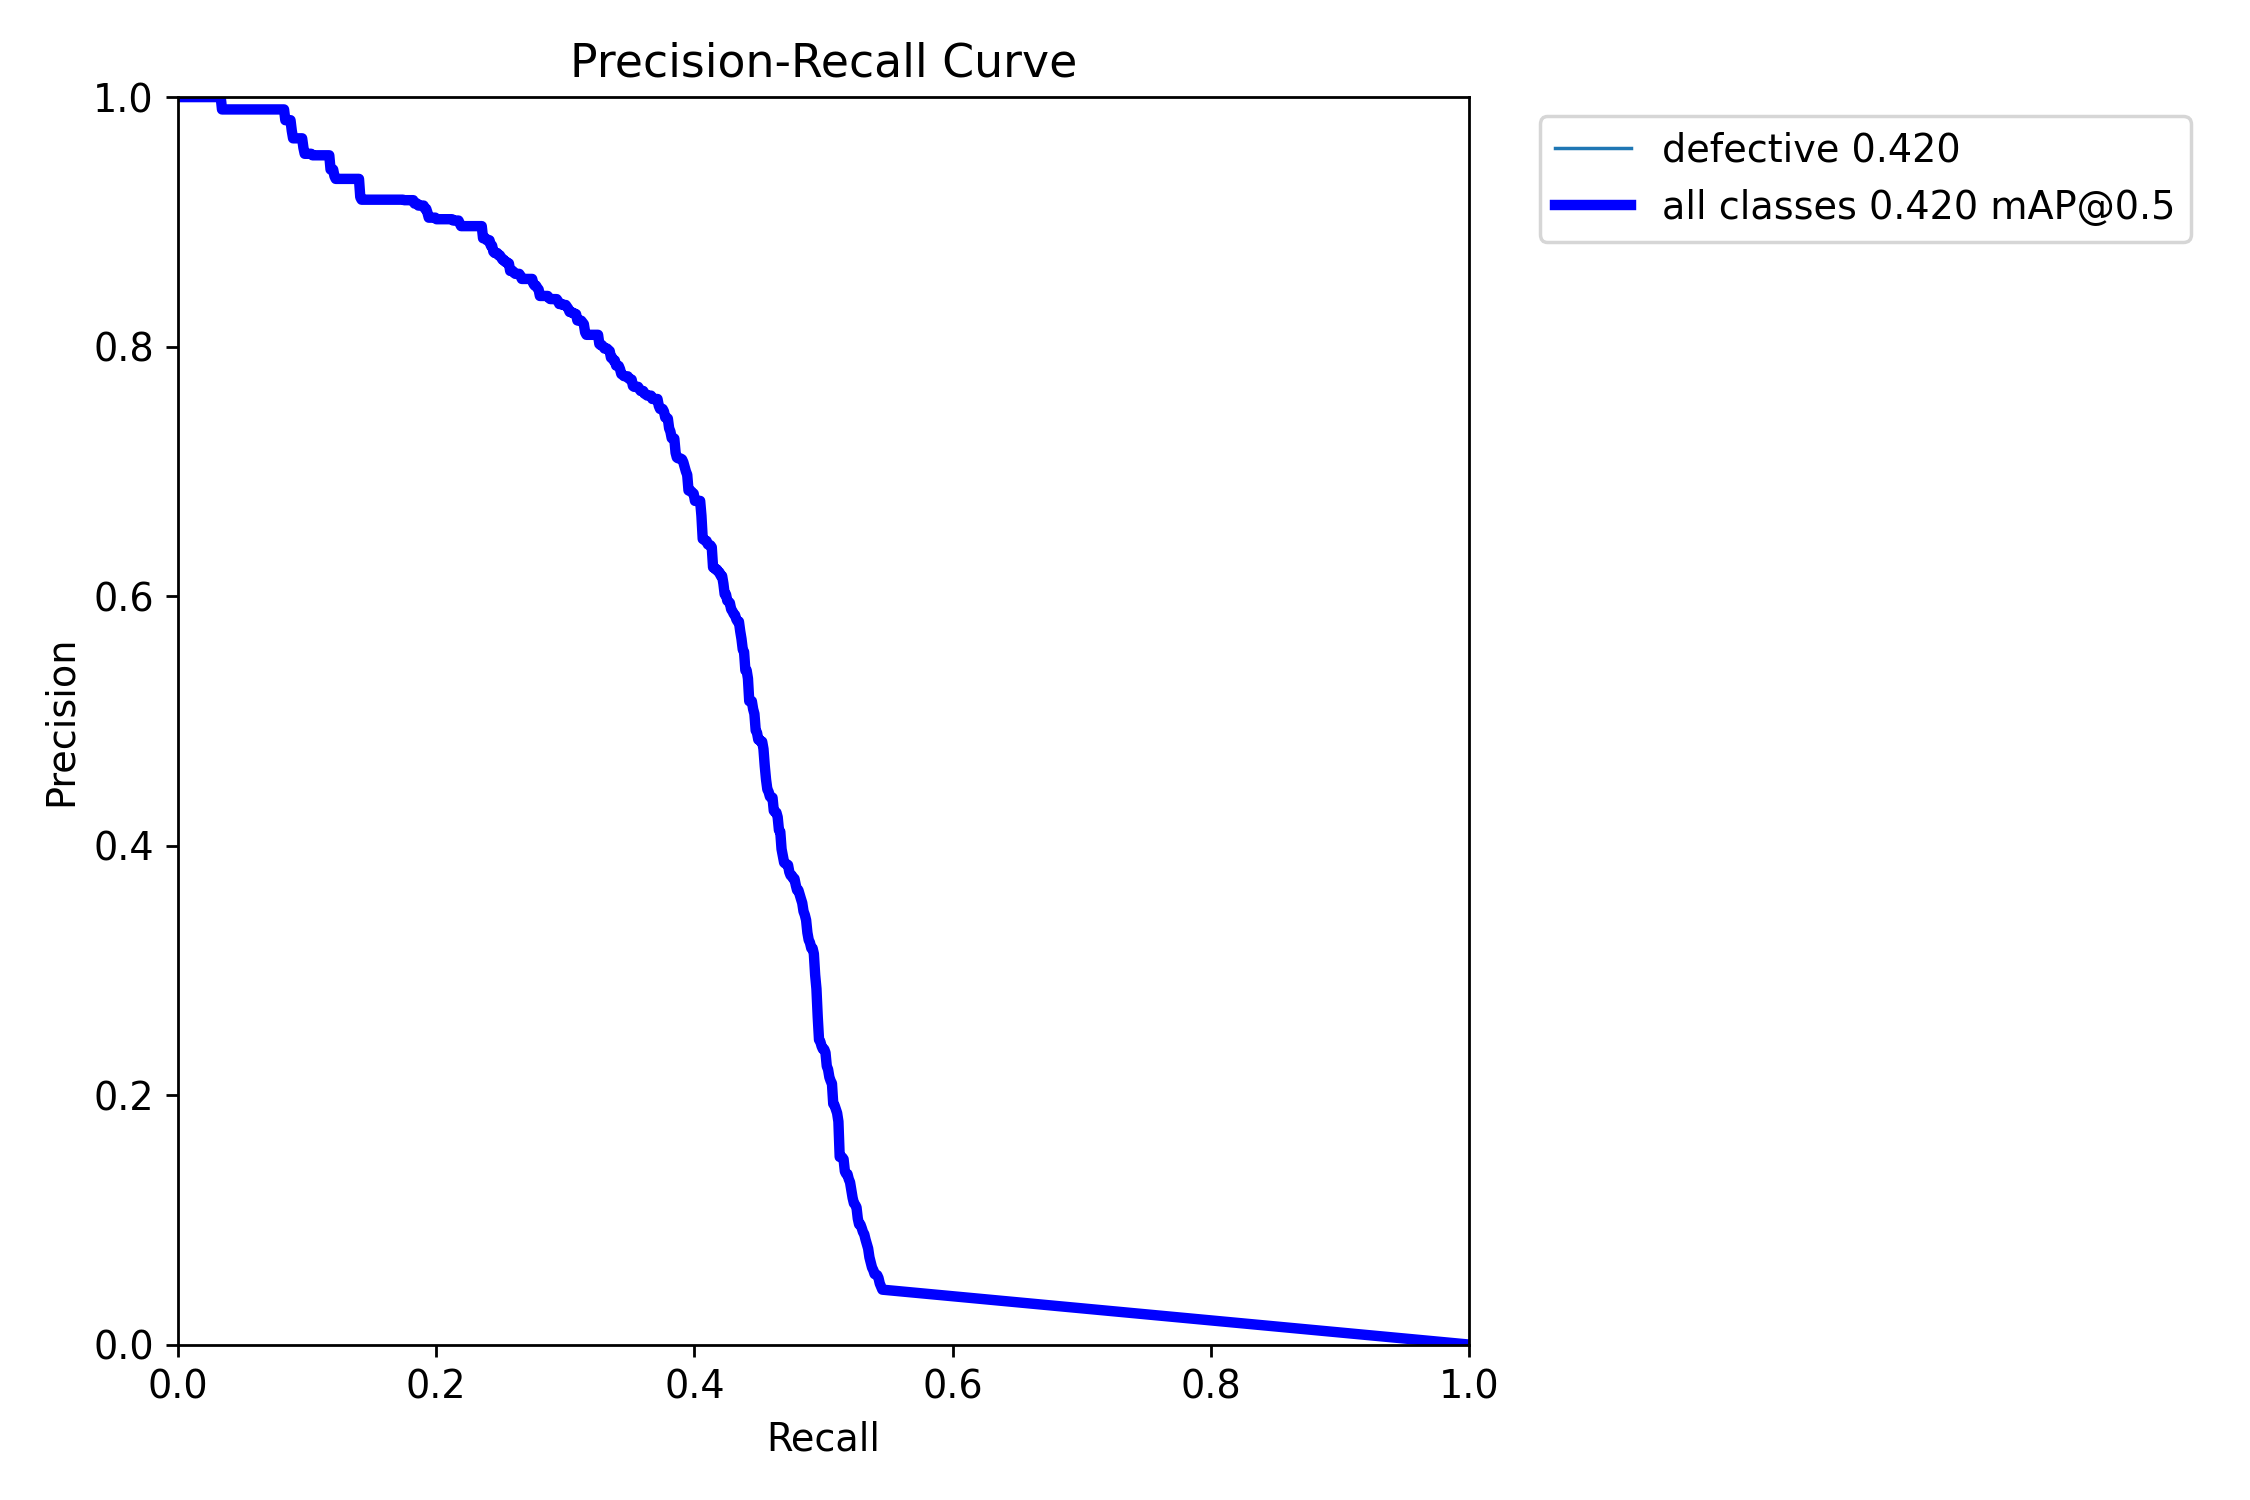

In [26]:
Image.open("yolov5/runs/train/my_model_5x/PR_curve.png")

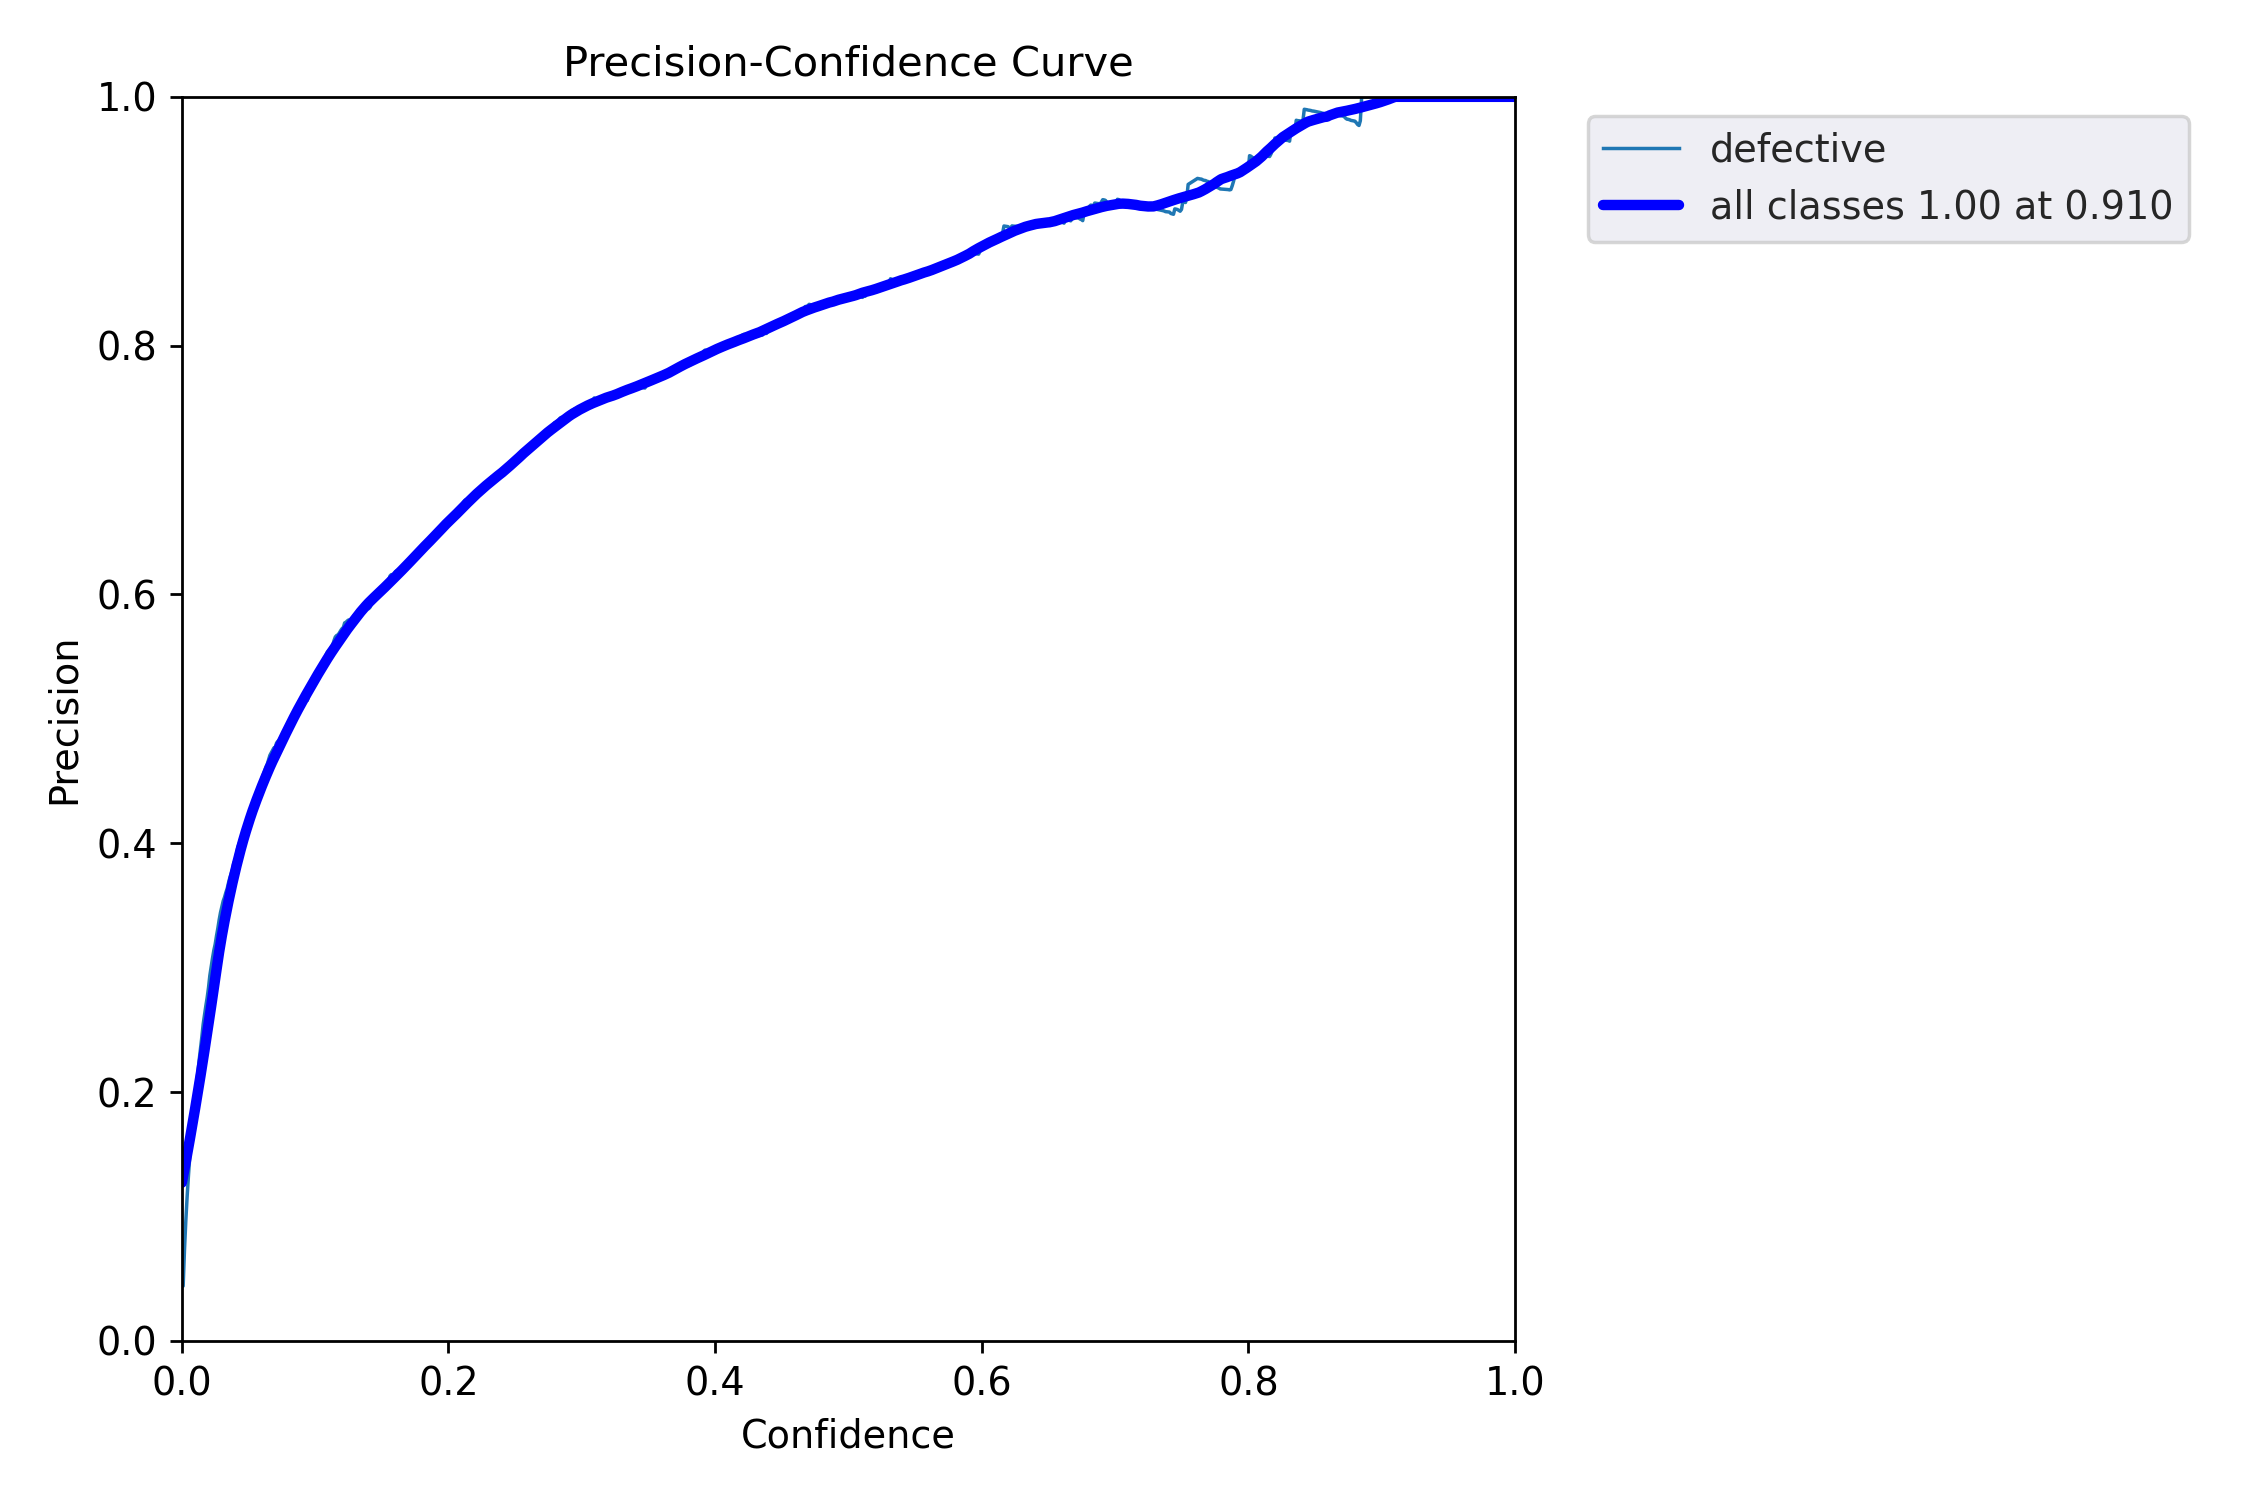

In [27]:
Image.open("yolov5/runs/train/my_model_5x/P_curve.png")

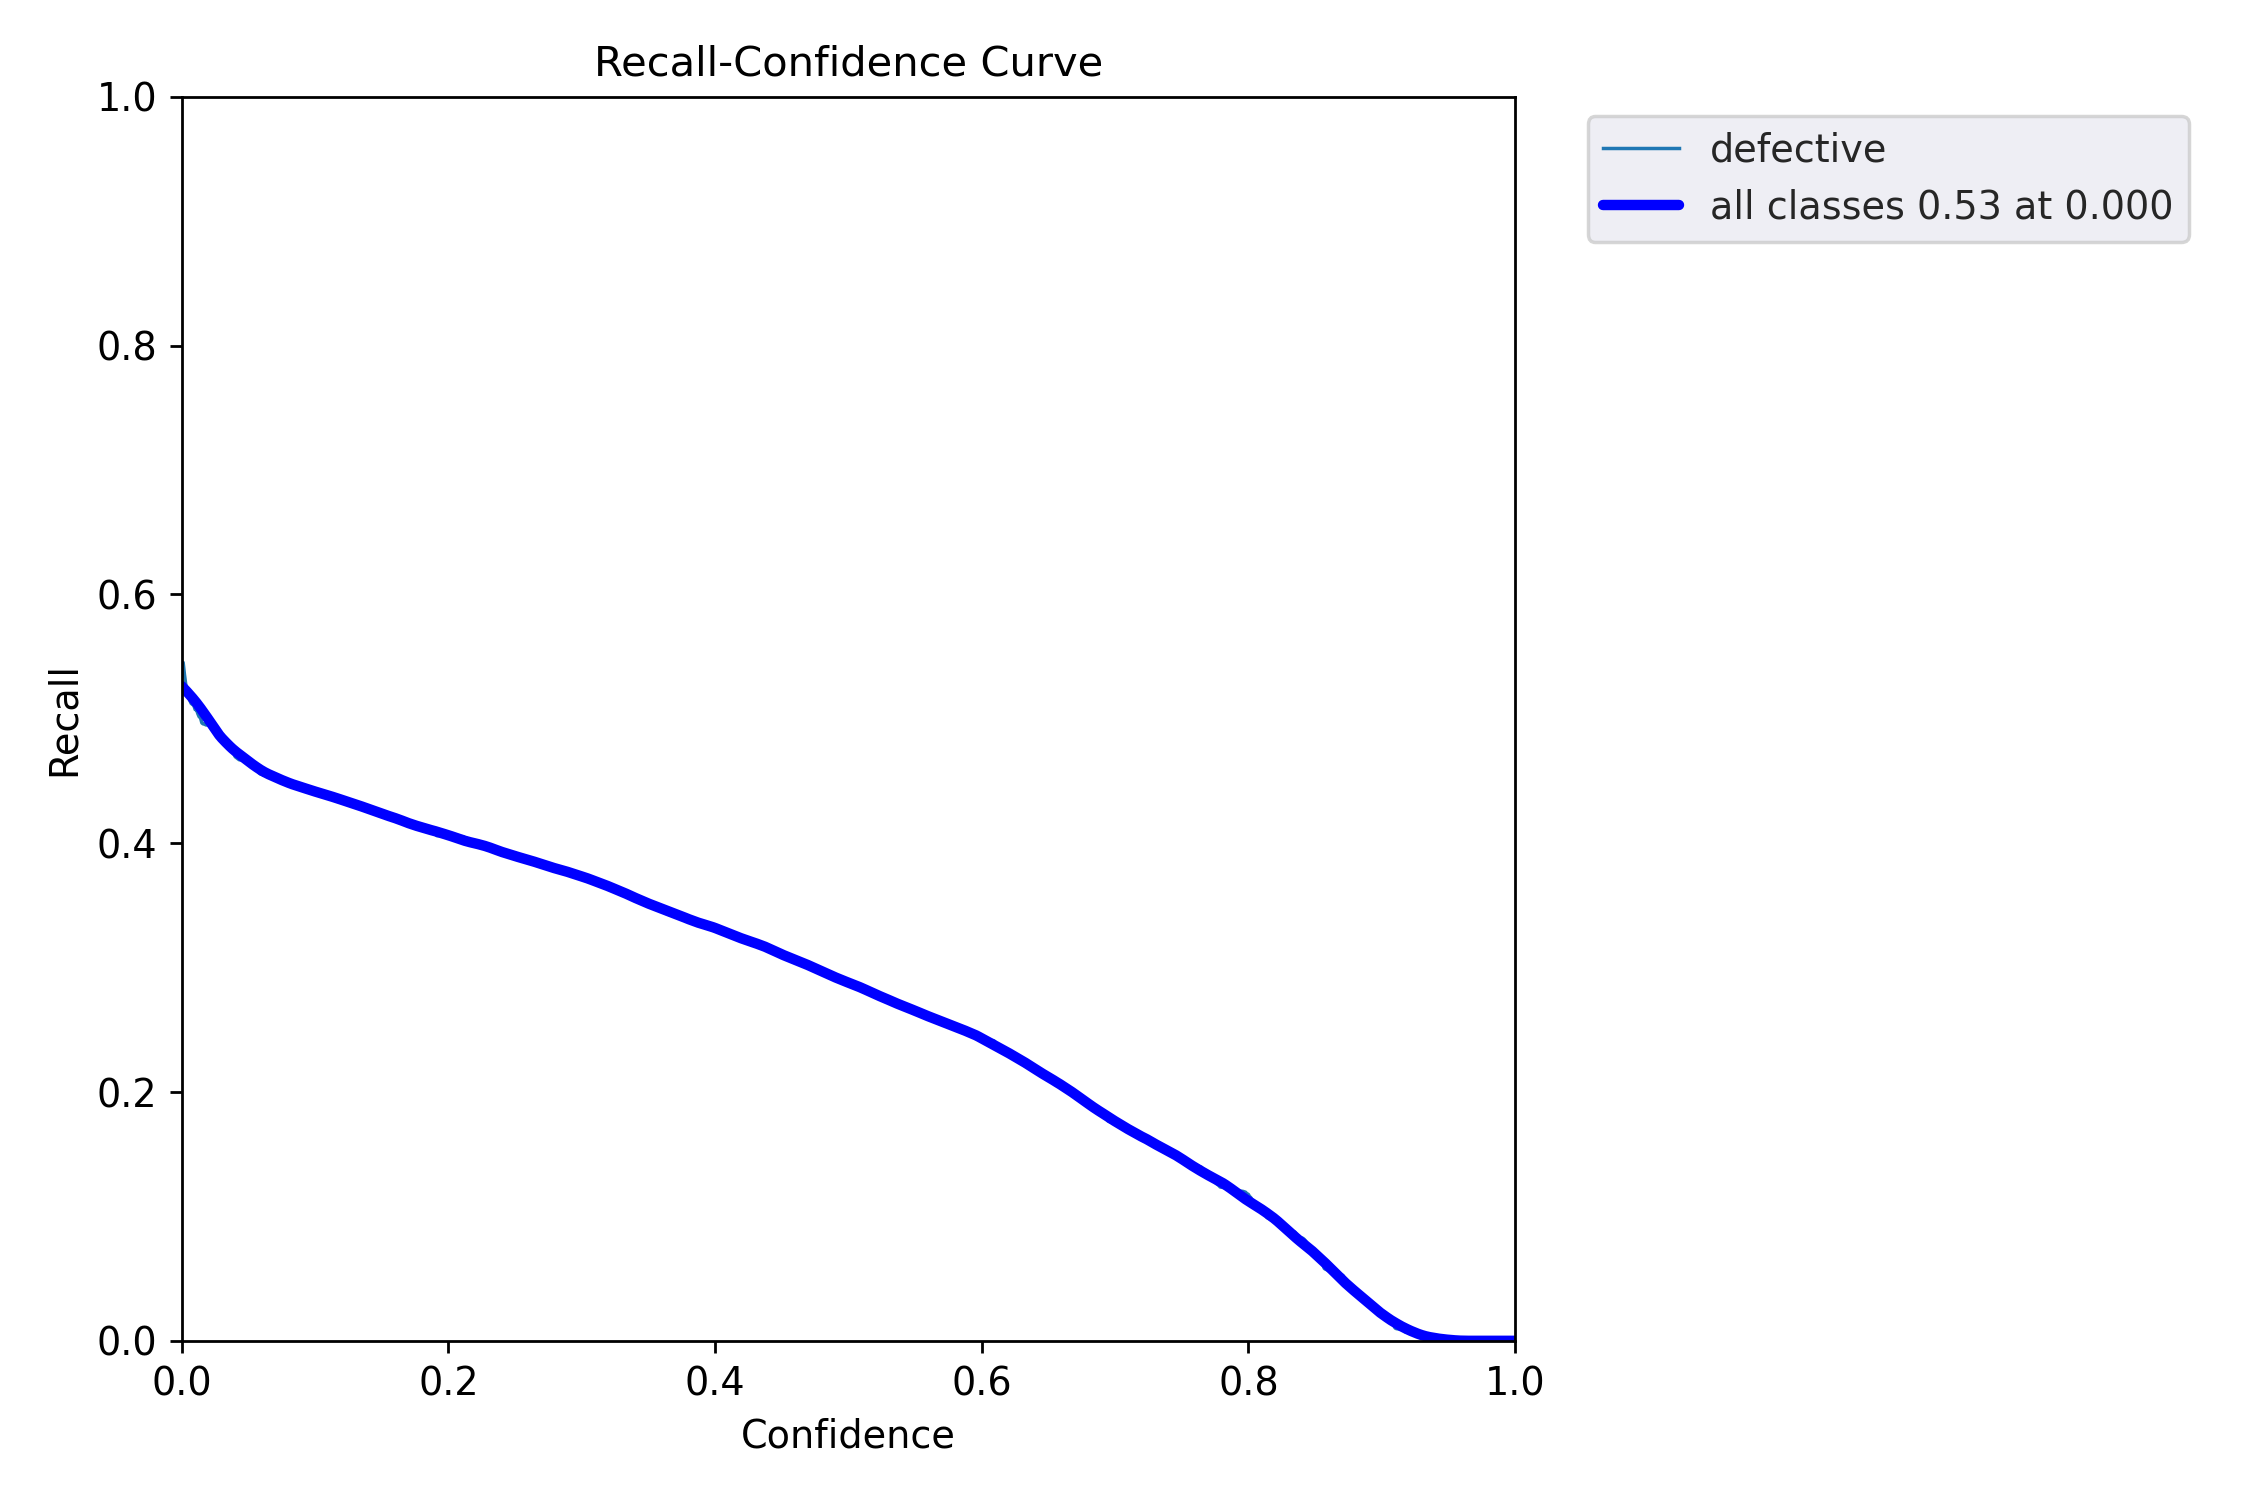

In [28]:
Image.open("yolov5/runs/train/my_model_5x/R_curve.png")

In [29]:
!python ./yolov5/detect.py --img {IMG_SIZE} --conf {CONF_TRESHOLD} --iou-thres {IOU_THRESHOLD} --source {'/kaggle/working/yolo/data/images/test'} --weights yolov5/runs/train/my_model_5x/weights/best.pt

detect: weights=['yolov5/runs/train/my_model_5x/weights/best.pt'], source=/kaggle/working/yolo/data/images/test, data=yolov5/data/coco128.yaml, imgsz=[512, 512], conf_thres=0.3, iou_thres=0.5, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: YOLOv5 requirement "tqdm>=4.64.0" not found, attempting AutoUpdate...

requirements: 1 package updated per /kaggle/working/yolo/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 v7.0-128-gb96f35c Python-3.7.12 torch-1.13.0 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 322 layers, 86180143 parameters, 0 gradients, 203.8 GFLOPs
image 1/1000 /kaggle/working/yolo/data/images/test/000395.jpg

In [30]:
!ls yolov5/runs/detect/exp/

000395.jpg  016825.jpg	031799.jpg  049628.jpg	064717.jpg  079063.jpg
000466.jpg  016850.jpg	031803.jpg  049658.jpg	064767.jpg  079067.jpg
000608.jpg  017113.jpg	031810.jpg  049777.jpg	064771.jpg  079084.jpg
000832.jpg  017280.jpg	031857.jpg  049841.jpg	064981.jpg  079105.jpg
000872.jpg  017310.jpg	031907.jpg  049885.jpg	064982.jpg  079242.jpg
000907.jpg  017334.jpg	031963.jpg  049895.jpg	065038.jpg  079376.jpg
000989.jpg  017530.jpg	032099.jpg  049897.jpg	065089.jpg  079380.jpg
000999.jpg  017541.jpg	032292.jpg  049935.jpg	065134.jpg  079464.jpg
001086.jpg  017644.jpg	032337.jpg  049979.jpg	065176.jpg  079521.jpg
001105.jpg  017866.jpg	032419.jpg  050013.jpg	065191.jpg  079603.jpg
001161.jpg  018201.jpg	032460.jpg  050021.jpg	065194.jpg  079641.jpg
001190.jpg  018205.jpg	032495.jpg  050068.jpg	065207.jpg  079871.jpg
001326.jpg  018294.jpg	032508.jpg  050070.jpg	065227.jpg  079968.jpg
001370.jpg  018315.jpg	032617.jpg  050143.jpg	065230.jpg  080900.jpg
001395.jpg  018333.jpg	032720.jpg 

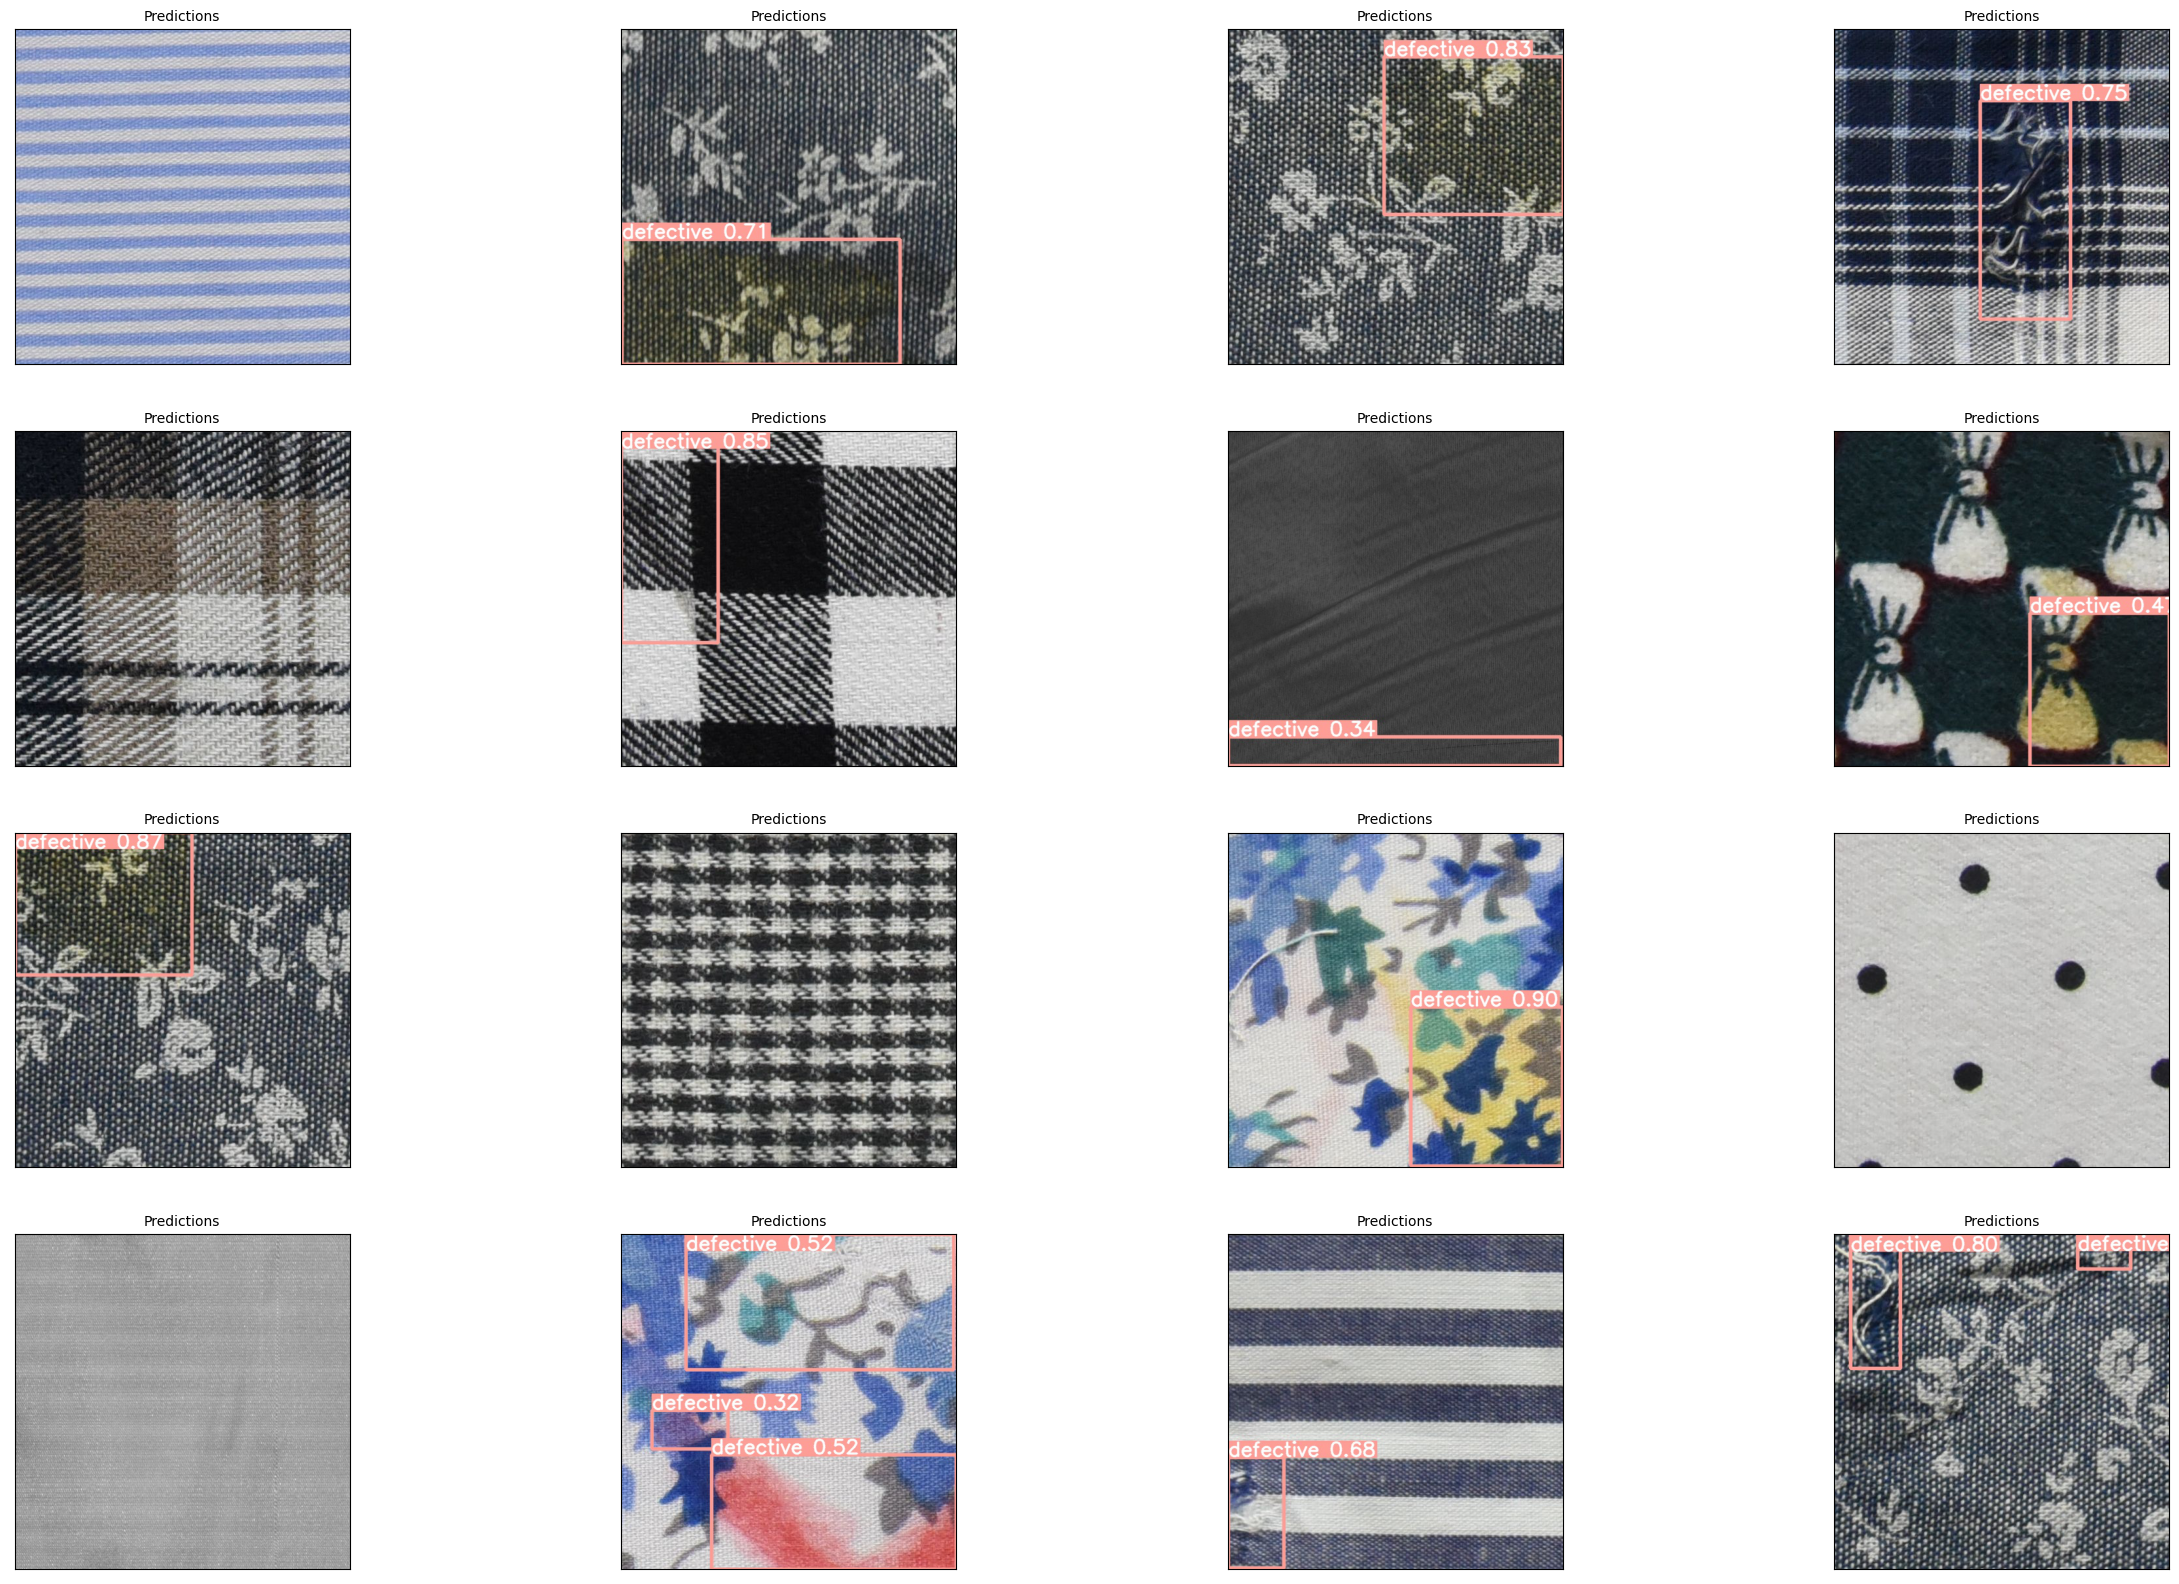

In [31]:
pred_dir = './yolov5/runs/detect/exp'
file_paths = []
flist = os.listdir(pred_dir)
for file in flist:
    fpath = os.path.join(pred_dir, file)
    file_paths.append(fpath)

plt.figure(figsize=(30, 20))
for i in range(16):
    random = np.random.randint(0, len(file_paths) - 1)
    plt.subplot(4, 4, i + 1)
    img_path = file_paths[random]
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.title('Predictions', size=10, color="black") 
    plt.xticks([])
    plt.yticks([])
    
plt.show()